# ITS307 Data Analytics : Autumn Semester 2022
# Practical 10 

# Evaluation metrics

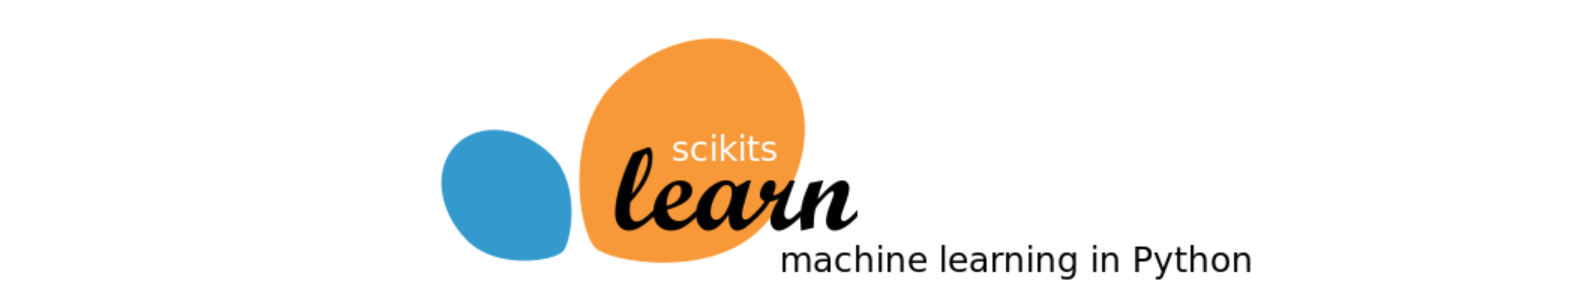

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> Handling Missing values</li>

<li> Scaling Numerical Features  </li>
<li> Encode Categorical Features  </li>
<li> Training Model</li>
<li> Evaluating Model</li>
<li> Making Prediction</li>
</ol>

# 0. Learning Objectives

For this test, we will use the Credit Card Approval dataset from the UCI Machine Learning Repository. Dataset has mixture of both numerical and categorical features with number of missing entries. The features of this dataset have been anonymized to protect the privacy, but some blog gives pretty good overview of the probable features. The probable features in a typical credit card application are `Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income` and finally the `ApprovalStatus`. For your understanding map the features descriptions given here with respect to columns in the dataset.

Feature Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)
    
  #### By the end of this lab, you should be able to predict whether an applicant will be getting credit card approval or not.

# 1. Importing Libraries 

Import all the necessary libraries here. If you don't remember all the libraries in this step, you may choose to import when required.

In [1]:
import pandas as pd
import numpy as np

# 2. Loading and Cleaning Data with Pandas


##  2.1.  Load data
- To load data, mention feature names given above in section 1 and display first five and last five records.

In [2]:
df=pd.read_csv("creditcard.txt", 
              names=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 
                                   'YearsEmployed', 'PriorDefault', 'Employed',' CreditScore',' DriversLicense', 
                                   'Citizen', 'ZipCode', 'Income','ApprovalStatus'])
df.head()

Gender    Age   Debt Married BankCustomer EducationLevel Ethnicity  \
0      b  30.83  0.000       u            g              w         v   
1      a  58.67  4.460       u            g              q         h   
2      a  24.50  0.500       u            g              q         h   
3      b  27.83  1.540       u            g              w         v   
4      b  20.17  5.625       u            g              w         v   

   YearsEmployed PriorDefault Employed   CreditScore  DriversLicense Citizen  \
0           1.25            t        t             1               f       g   
1           3.04            t        t             6               f       g   
2           1.50            t        f             0               f       g   
3           3.75            t        t             5               t       g   
4           1.71            t        f             0               f       s   

  ZipCode  Income ApprovalStatus  
0   00202       0              +  
1   00043     560              +  
2   00280     824              +  
3   00100       3              +  
4   00120       0              +

In [3]:
df.tail()

Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
685      b  21.08  10.085       y            p              e         h   
686      a  22.67   0.750       u            g              c         v   
687      a  25.25  13.500       y            p             ff        ff   
688      b  17.92   0.205       u            g             aa         v   
689      b  35.00   3.375       u            g              c         h   

     YearsEmployed PriorDefault Employed   CreditScore  DriversLicense  \
685           1.25            f        f             0               f   
686           2.00            f        t             2               t   
687           2.00            f        t             1               t   
688           0.04            f        f             0               f   
689           8.29            f        f             0               t   

    Citizen ZipCode  Income ApprovalStatus  
685       g   00260       0              -  
686       g   00200     394              -  
687       g   00200       1              -  
688       g   00280     750              -  
689       g   00000       0              -

## 2.2.  Print summary of the dataset

In [4]:
df.describe()

Debt  YearsEmployed   CreditScore         Income
count  690.000000     690.000000     690.00000     690.000000
mean     4.758725       2.223406       2.40000    1017.385507
std      4.978163       3.346513       4.86294    5210.102598
min      0.000000       0.000000       0.00000       0.000000
25%      1.000000       0.165000       0.00000       0.000000
50%      2.750000       1.000000       0.00000       5.000000
75%      7.207500       2.625000       3.00000     395.500000
max     28.000000      28.500000      67.00000  100000.000000

## 2.3. Check null values for all the colums in the dataset

In [5]:
df.isna().sum()

Gender             0
Age                0
Debt               0
Married            0
BankCustomer       0
EducationLevel     0
Ethnicity          0
YearsEmployed      0
PriorDefault       0
Employed           0
 CreditScore       0
 DriversLicense    0
Citizen            0
ZipCode            0
Income             0
ApprovalStatus     0
dtype: int64

## 2.4. Check datatypes of all the columns

In [6]:
df.dtypes

Gender              object
Age                 object
Debt               float64
Married             object
BankCustomer        object
EducationLevel      object
Ethnicity           object
YearsEmployed      float64
PriorDefault        object
Employed            object
 CreditScore         int64
 DriversLicense     object
Citizen             object
ZipCode             object
Income               int64
ApprovalStatus      object
dtype: object

## 2.5 Cleaning data
- There are some columns which contains value as "?". Replace them with np.nan.

In [7]:
df.replace('?',np.nan, inplace = True)
df.isna().sum()

Gender             12
Age                12
Debt                0
Married             6
BankCustomer        6
EducationLevel      9
Ethnicity           9
YearsEmployed       0
PriorDefault        0
Employed            0
 CreditScore        0
 DriversLicense     0
Citizen             0
ZipCode            13
Income              0
ApprovalStatus      0
dtype: int64

## 2.6 Type conversion
- Some numerical features are not in expected types. Convert their types.

In [8]:
df=df.astype({'Age':'float64'})
df.dtypes

Gender              object
Age                float64
Debt               float64
Married             object
BankCustomer        object
EducationLevel      object
Ethnicity           object
YearsEmployed      float64
PriorDefault        object
Employed            object
 CreditScore         int64
 DriversLicense     object
Citizen             object
ZipCode             object
Income               int64
ApprovalStatus      object
dtype: object

# 3. Handling Missing Values

- Before handling missing value, store all the categorical data in `categorical_features` and numerical data in `numerical features`


- Print missing values of both categorical and numerical features before handling missing values

In [9]:
numerical_feature= df.select_dtypes(include = ['int64','float64'])
numerical_feature.isna().sum()

Age              12
Debt              0
YearsEmployed     0
 CreditScore      0
Income            0
dtype: int64

In [10]:
categorical_features= df.select_dtypes(include = ['object'])
categorical_features.isna().sum()

Gender             12
Married             6
BankCustomer        6
EducationLevel      9
Ethnicity           9
PriorDefault        0
Employed            0
 DriversLicense     0
Citizen             0
ZipCode            13
ApprovalStatus      0
dtype: int64

## 3.1. Handling Missing values for Categorical variable
- Use sklearn SimpleImputer to impute categorical values with most frequest values. 

- Check missing records after imputation

In [11]:
from sklearn.impute import SimpleImputer
impute= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
categoricaldf = impute.fit_transform(categorical_features)
categoricaldf = pd.DataFrame(data = categoricaldf, columns = categorical_features.columns)
categoricaldf

Gender Married BankCustomer EducationLevel Ethnicity PriorDefault  \
0        b       u            g              w         v            t   
1        a       u            g              q         h            t   
2        a       u            g              q         h            t   
3        b       u            g              w         v            t   
4        b       u            g              w         v            t   
..     ...     ...          ...            ...       ...          ...   
685      b       y            p              e         h            f   
686      a       u            g              c         v            f   
687      a       y            p             ff        ff            f   
688      b       u            g             aa         v            f   
689      b       u            g              c         h            f   

    Employed  DriversLicense Citizen ZipCode ApprovalStatus  
0          t               f       g   00202              +  
1          t               f       g   00043              +  
2          f               f       g   00280              +  
3          t               t       g   00100              +  
4          f               f       s   00120              +  
..       ...             ...     ...     ...            ...  
685        f               f       g   00260              -  
686        t               t       g   00200              -  
687        t               t       g   00200              -  
688        f               f       g   00280              -  
689        f               t       g   00000              -  

[690 rows x 11 columns]

In [12]:
categoricaldf.isna().sum()

Gender             0
Married            0
BankCustomer       0
EducationLevel     0
Ethnicity          0
PriorDefault       0
Employed           0
 DriversLicense    0
Citizen            0
ZipCode            0
ApprovalStatus     0
dtype: int64

## 3.2. Handling Missing values for numerical variable

- Use sklearn SimpleImputer to impute categorical values with most frequest values. 

- Check missing records after imputation

In [13]:
impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')
numericaldf = impute.fit_transform(numerical_feature)
numericaldf = pd.DataFrame(data = numericaldf, columns = numerical_feature.columns)
numericaldf

Age    Debt  YearsEmployed   CreditScore  Income
0    30.83   0.000           1.25           1.0     0.0
1    58.67   4.460           3.04           6.0   560.0
2    24.50   0.500           1.50           0.0   824.0
3    27.83   1.540           3.75           5.0     3.0
4    20.17   5.625           1.71           0.0     0.0
..     ...     ...            ...           ...     ...
685  21.08  10.085           1.25           0.0     0.0
686  22.67   0.750           2.00           2.0   394.0
687  25.25  13.500           2.00           1.0     1.0
688  17.92   0.205           0.04           0.0   750.0
689  35.00   3.375           8.29           0.0     0.0

[690 rows x 5 columns]

In [14]:
numericaldf.isna().sum()

Age              0
Debt             0
YearsEmployed    0
 CreditScore     0
Income           0
dtype: int64

# 4. Scaling Numerical Features
- Use any scaling techniques to scale all the numerical features

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric = scaler.fit_transform(numericaldf)
sdf=pd.DataFrame(numeric, columns=numericaldf.columns)
sdf

Age      Debt  YearsEmployed   CreditScore    Income
0   -0.062321 -0.956613      -0.291083     -0.288101 -0.195413
1    2.288101 -0.060051       0.244190      0.740830 -0.087852
2   -0.596738 -0.856102      -0.216324     -0.493887 -0.037144
3   -0.315599 -0.647038       0.456505      0.535044 -0.194837
4   -0.962303  0.174141      -0.153526     -0.493887 -0.195413
..        ...       ...            ...           ...       ...
685 -0.885475  1.070704      -0.291083     -0.493887 -0.195413
686 -0.751238 -0.805846      -0.066806     -0.082314 -0.119736
687 -0.533418  1.757198      -0.066806     -0.288101 -0.195221
688 -1.152262 -0.915403      -0.652915     -0.493887 -0.051358
689  0.289736 -0.278161       1.814125     -0.493887 -0.195413

[690 rows x 5 columns]

# 5. Encode Categorical data
- Since we are not aware of the type of categorical data, lets encode all features using OrdinalEncoder. If you are familiar with other encoding techniques, you may use them too.


- Use LabelEncoder to encode Target variable and store in variable `y`


- Concatenate Categorical and Numerical features together in single dataframe `X`


In [16]:
ordinal = categoricaldf.drop(['ApprovalStatus'],axis = 1)
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
encoded = oe.fit_transform(ordinal)
ordinaldf = pd.DataFrame(data=encoded,columns = ordinal.columns)
ordinaldf

Gender  Married  BankCustomer  EducationLevel  Ethnicity  PriorDefault  \
0       1.0      1.0           0.0            12.0        7.0           1.0   
1       0.0      1.0           0.0            10.0        3.0           1.0   
2       0.0      1.0           0.0            10.0        3.0           1.0   
3       1.0      1.0           0.0            12.0        7.0           1.0   
4       1.0      1.0           0.0            12.0        7.0           1.0   
..      ...      ...           ...             ...        ...           ...   
685     1.0      2.0           2.0             4.0        3.0           0.0   
686     0.0      1.0           0.0             1.0        7.0           0.0   
687     0.0      2.0           2.0             5.0        2.0           0.0   
688     1.0      1.0           0.0             0.0        7.0           0.0   
689     1.0      1.0           0.0             1.0        3.0           0.0   

     Employed   DriversLicense  Citizen  ZipCode  
0         1.0              0.0      0.0     68.0  
1         1.0              0.0      0.0     11.0  
2         0.0              0.0      0.0     96.0  
3         1.0              1.0      0.0     31.0  
4         0.0              0.0      2.0     37.0  
..        ...              ...      ...      ...  
685       0.0              0.0      0.0     90.0  
686       1.0              1.0      0.0     67.0  
687       1.0              1.0      0.0     67.0  
688       0.0              0.0      0.0     96.0  
689       0.0              1.0      0.0      0.0  

[690 rows x 10 columns]

In [17]:
target =  categoricaldf.ApprovalStatus
target

0      +
1      +
2      +
3      +
4      +
      ..
685    -
686    -
687    -
688    -
689    -
Name: ApprovalStatus, Length: 690, dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
target = le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [19]:
ordinaldf['target'] = target.tolist()
ordinaldf.head()
xdf = pd.concat([sdf,ordinaldf], axis = 1)
xdf.head()

Age      Debt  YearsEmployed   CreditScore    Income  Gender  Married  \
0 -0.062321 -0.956613      -0.291083     -0.288101 -0.195413     1.0      1.0   
1  2.288101 -0.060051       0.244190      0.740830 -0.087852     0.0      1.0   
2 -0.596738 -0.856102      -0.216324     -0.493887 -0.037144     0.0      1.0   
3 -0.315599 -0.647038       0.456505      0.535044 -0.194837     1.0      1.0   
4 -0.962303  0.174141      -0.153526     -0.493887 -0.195413     1.0      1.0   

   BankCustomer  EducationLevel  Ethnicity  PriorDefault  Employed  \
0           0.0            12.0        7.0           1.0       1.0   
1           0.0            10.0        3.0           1.0       1.0   
2           0.0            10.0        3.0           1.0       0.0   
3           0.0            12.0        7.0           1.0       1.0   
4           0.0            12.0        7.0           1.0       0.0   

    DriversLicense  Citizen  ZipCode  target  
0              0.0      0.0     68.0       0  
1              0.0      0.0     11.0       0  
2              0.0      0.0     96.0       0  
3              1.0      0.0     31.0       0  
4              0.0      2.0     37.0       0

# 6. Training Model

## 6.1. Train test split
- Before training the model, split your data to train and test set. Keep your test size as 20%, and random_state value as 5. Also make sure that your test data contain equal number of data from both the clases.

In [20]:
from sklearn.model_selection import train_test_split

X= xdf.drop(['target'], axis=1)
y=xdf.target


X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=5, shuffle=True, stratify=xdf.target)

In [21]:
y_test

317    0
277    1
236    0
306    1
269    0
      ..
627    1
608    1
408    1
125    0
199    0
Name: target, Length: 138, dtype: int64

## 6.2 Train the model
- Use any three different algorithm to train your model. Make sure you specify the right parameters for each one of them.

In [22]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_pred=model.predict(X_test)
y_pred


array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0], dtype=int64)

# 7. Evaluating the model

- Use score method to check accuracy of all the models


- Build confusion matrix for all the model and visualize using heatmap.


- Find Precision, Recall and F1-score

In [25]:
from sklearn.metrics import accuracy_score


In [26]:
model.score(X_train,y_train)

0.8586956521739131

In [27]:
model.score(X_test,y_test)

0.9057971014492754

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[57,  4],
       [ 9, 68]], dtype=int64)

In [29]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)



array([0.86363636, 0.94444444])

In [30]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)

array([0.93442623, 0.88311688])

In [31]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.8976378 , 0.91275168])

# 8. Making Prediction
- Take any sample record from your training data and make prediction.

In [33]:
x_sample=[[-0.3,-0.5,-0.3,-0.4,-0.3,1,2,3,4,5,6,7,8,9,8,]]
value= model.predict(x_sample)[0]
xdf.target_name [0]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


AttributeError: 'DataFrame' object has no attribute 'target_name'

In [ ]:
xdf

# 9. Improve your model

- Use any technique to improve your model.